In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [20]:
df=pd.read_excel('employment.xlsx')
df.head(10)

,Unnamed: 0.1,Unnamed: 0,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsExp,YearsProExp,Country,PreviousSalary,HaveWorkedWith,NumSkills,Employed
0,0,0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,51552,C++;Python;Git;PostgreSQL,4,0
1,1,1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,2,2,<35,No,Master,1,Man,No,Dev,15,6,Germany,77290,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,3,3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,46135,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,4,4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,160932,C++;Python,2,0
5,5,5,<35,No,Master,1,Man,No,Dev,9,2,France,38915,JavaScript;Python;Docker;Git;MySQL,5,0
6,6,6,>35,No,Master,1,Man,No,Dev,26,18,Germany,77831,C++;HTML/CSS;Java;JavaScript;Kotlin;Node.js;Ty...,17,1
7,7,7,<35,No,Master,1,Man,No,NotDev,14,5,Switzerland,81319,C++;Python;Docker;Git,4,0
8,8,8,>35,No,Undergraduate,1,Man,No,Dev,39,21,United Kingdom of Great Britain and Northern I...,68507,Python;Git;PostgreSQL,3,0
9,9,9,>35,No,Master,1,Man,No,Dev,20,16,Russian Federation,37752,Delphi;Java;SQL;Docker;Git;PostgreSQL,6,0


In [21]:
df_drop=df.drop(['Unnamed: 0.1', 'Unnamed: 0', 'HaveWorkedWith', 'Gender', 'Country'], axis=1)

In [22]:
print(df_drop.columns)

Index(['Age', 'Accessibility', 'EdLevel', 'Employment', 'MentalHealth',
       'MainBranch', 'YearsExp', 'YearsProExp', 'PreviousSalary', 'NumSkills',
       'Employed'],
      dtype='object')


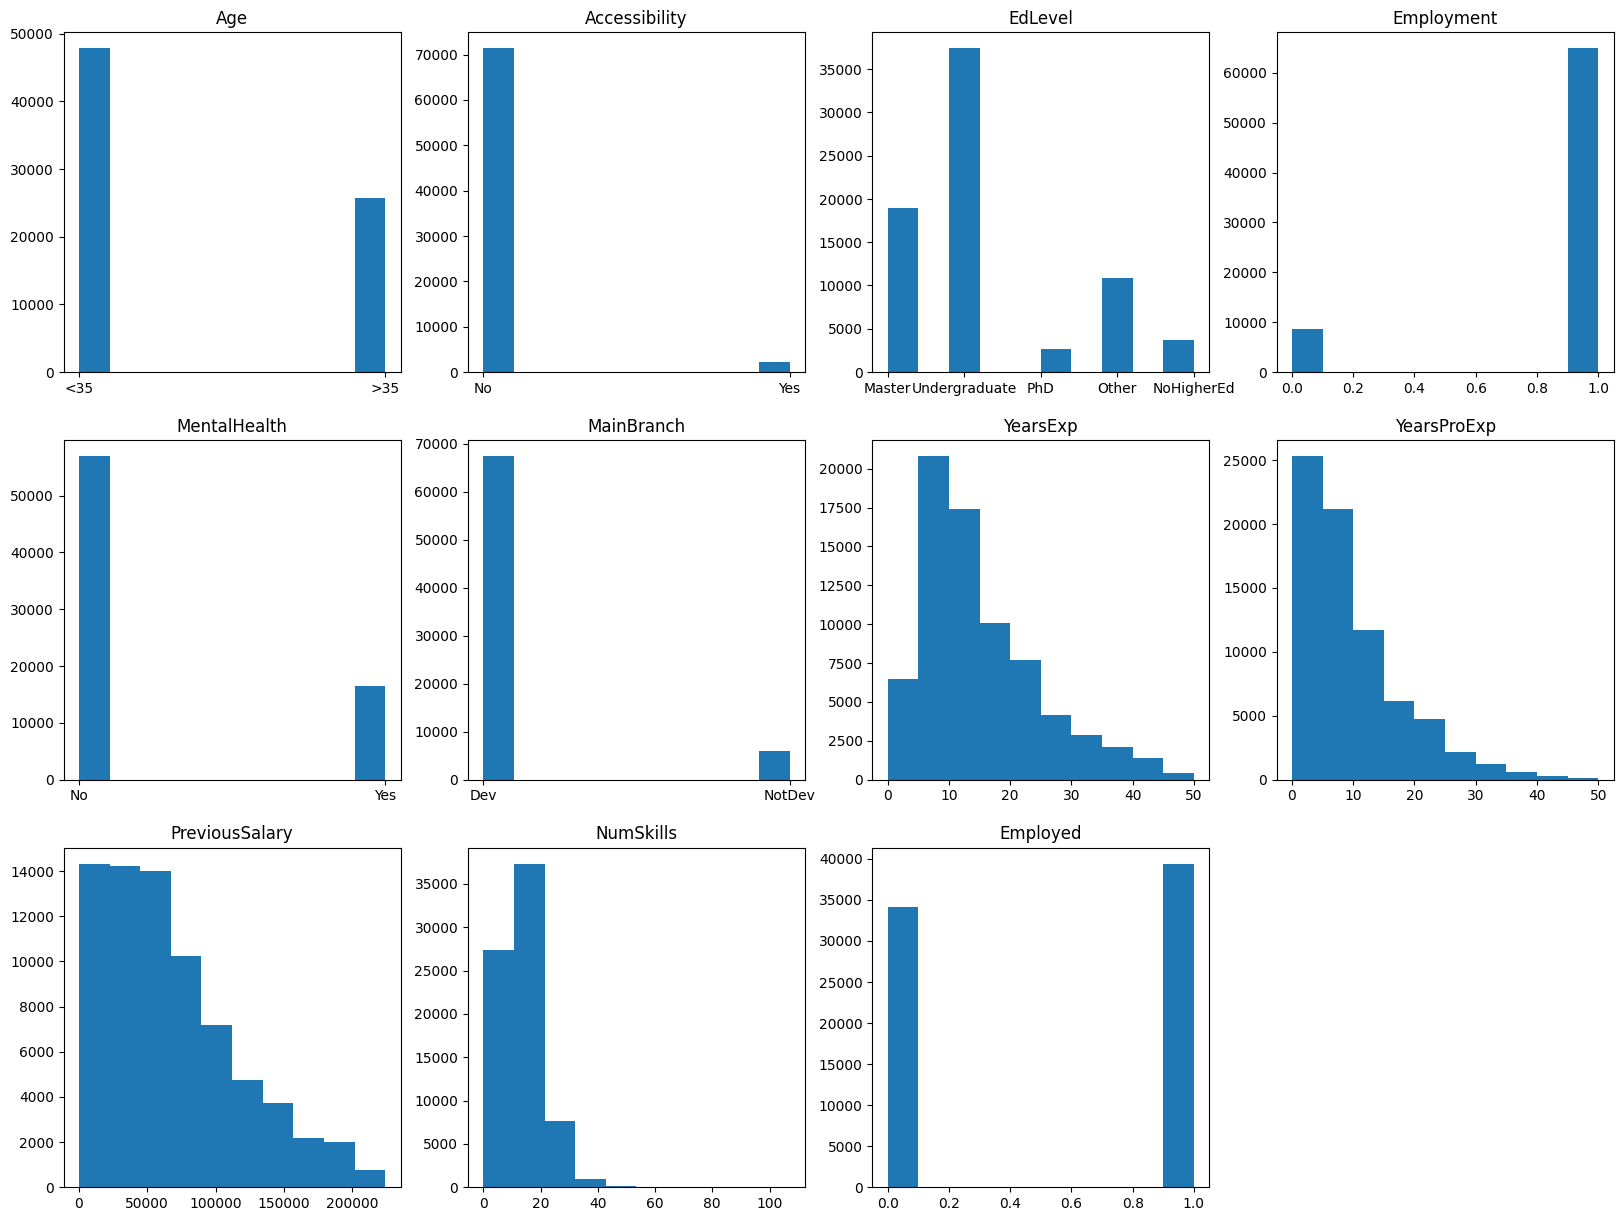

In [23]:
col=df_drop.columns
plt.subplots(figsize=(20,15))
plt.delaxes()
for i in range(len(df_drop.columns)):
    plt.subplot(3,4,i+1)
    plt.hist(df_drop[col[i]])
    plt.title(col[i])
plt.show()

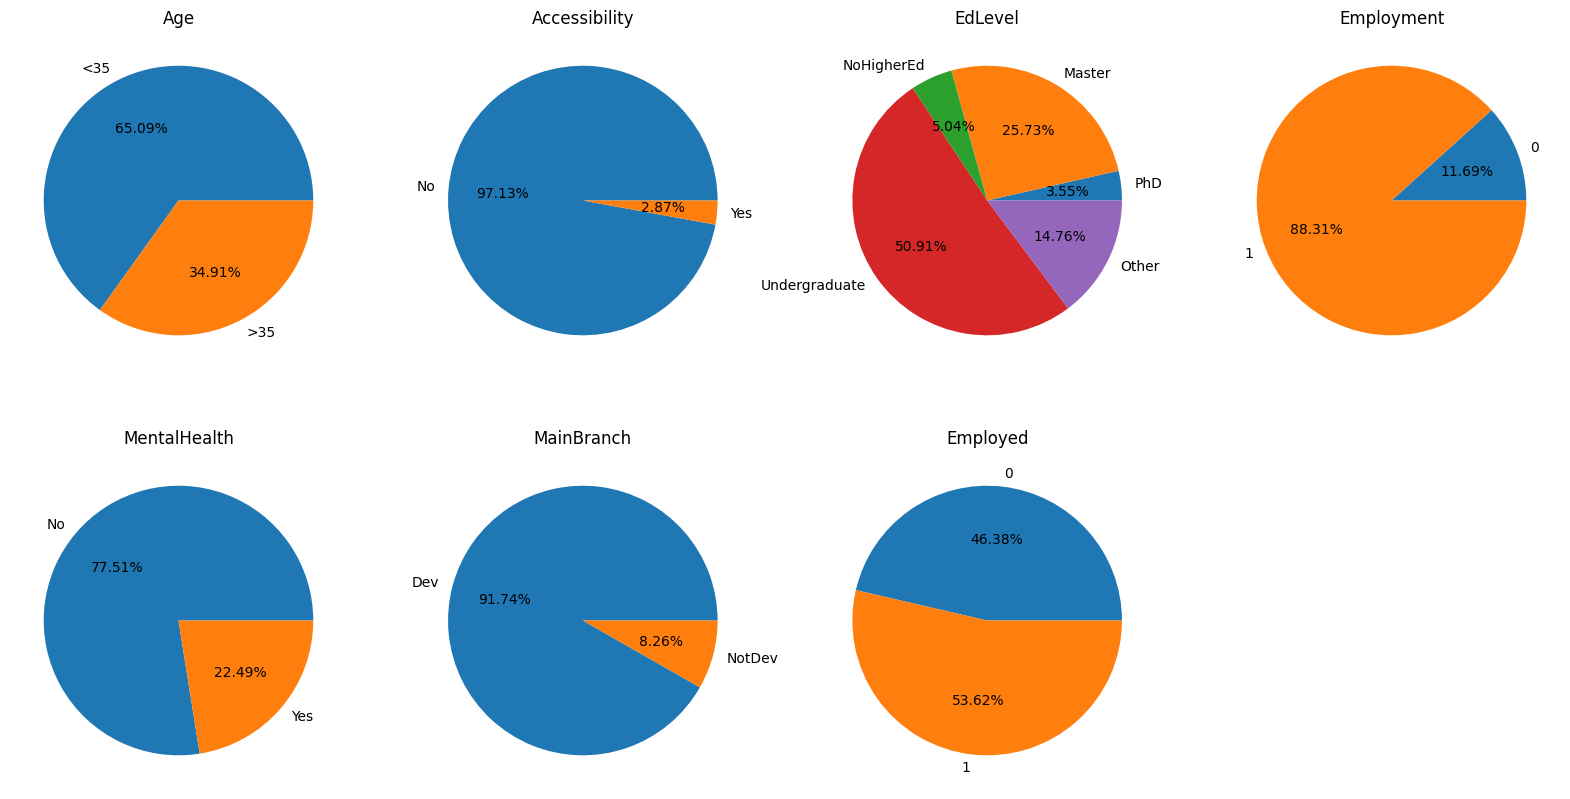

In [24]:
col_pie=['Age', 'Accessibility', 'EdLevel', 'Employment', 'MentalHealth', 'MainBranch', 'Employed']
plt.subplots(figsize=(20,10))
plt.delaxes()
for i in range(len(col_pie)):
    plt.subplot(2,4,i+1)
    list_count=[]
    list_key=list(set(df_drop[col_pie[i]]))
    for sets in list_key:
        list_count.append(sum(df_drop[col_pie[i]]==sets))
    plt.pie(list_count, labels=list_key, autopct='%1.2f%%')
    plt.title(col_pie[i])
plt.show()

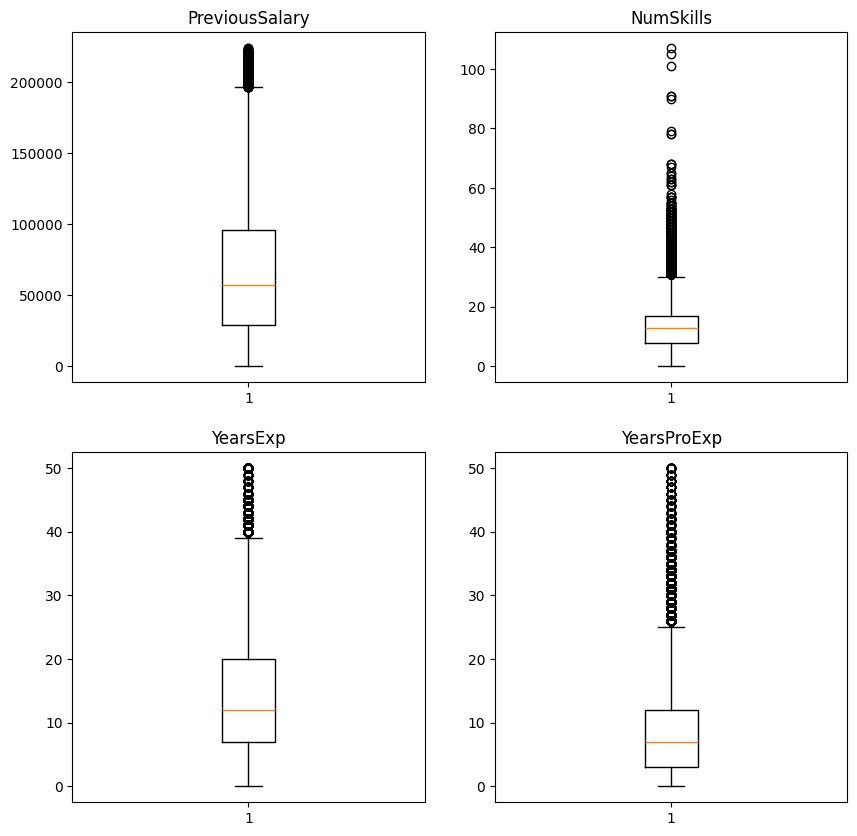

In [26]:
col_box=["PreviousSalary", "NumSkills", "YearsExp", "YearsProExp"]
plt.subplots(figsize=(10,10))
plt.delaxes()
i=1
for col in col_box:
    plt.subplot(2,2,i)
    plt.boxplot(df_drop[col])
    plt.title(col)
    i+=1
plt.show()

In [40]:
print(np.array(df_drop["NumSkills"]))

[ 4 12  7 ... 12 15  2]


In [63]:
q1=[]
q2=[]
q3=[]
avg=[]
iqr=[]
for col in col_box:
    print(col)
    q1_temp = np.percentile(df_drop[col], 25)
    q2_temp = np.percentile(df_drop[col], 50)
    q3_temp = np.percentile(df_drop[col], 75)
    average_temp = np.mean(df_drop[col])
    IQR_temp = q3_temp - q1_temp
    
    print("Q1 : " + str(q1_temp))
    print("Q2 : " + str(q2_temp))
    print("Q3 : " + str(q3_temp))
    print("Average : " + str(average_temp))
    print("IQR : " + str(IQR_temp))
    
    q1.append(q1_temp)
    q2.append(q2_temp)
    q3.append(q3_temp)
    avg.append(average_temp)
    iqr.append(IQR_temp)
    print()
q1 = np.array(q1)
q2 = np.array(q2)
q3 = np.array(q3)


PreviousSalary
Q1 : 28839.0
Q2 : 57588.0
Q3 : 95979.0
Average : 67750.2606109281
IQR : 67140.0

NumSkills
Q1 : 8.0
Q2 : 13.0
Q3 : 17.0
Average : 13.428221393373445
IQR : 9.0

YearsExp
Q1 : 7.0
Q2 : 12.0
Q3 : 20.0
Average : 14.218902289619123
IQR : 13.0

YearsProExp
Q1 : 3.0
Q2 : 7.0
Q3 : 12.0
Average : 9.098377392393346
IQR : 9.0



In [81]:
import numpy as np

def remove_outliers_iqr(col_box):
    lower_bound = q1 - 1.5 * (q3-q1)
    upper_bound = q3 + 1.5 * (q3-q1)
    # masking tanpa outlier
    mask = (df_drop[col_box[0]] >= lower_bound[0]) & (df_drop[col_box[0]] <= upper_bound[0]) & (df_drop[col_box[1]] >= lower_bound[1]) & (df_drop[col_box[1]] <= upper_bound[1]) & (df_drop[col_box[2]] >= lower_bound[2]) & (df_drop[col_box[2]] <= upper_bound[2]) & (df_drop[col_box[3]] >= lower_bound[3]) & (df_drop[col_box[3]] <= upper_bound[3])  
        # plt.subplot(2,2,i)
        # plt.boxplot(df_drop[mask])
        # plt.title(col)
    return df_drop[mask]
    # plt.show()
    # Return the df_drop[col[0]] tanpa outlier

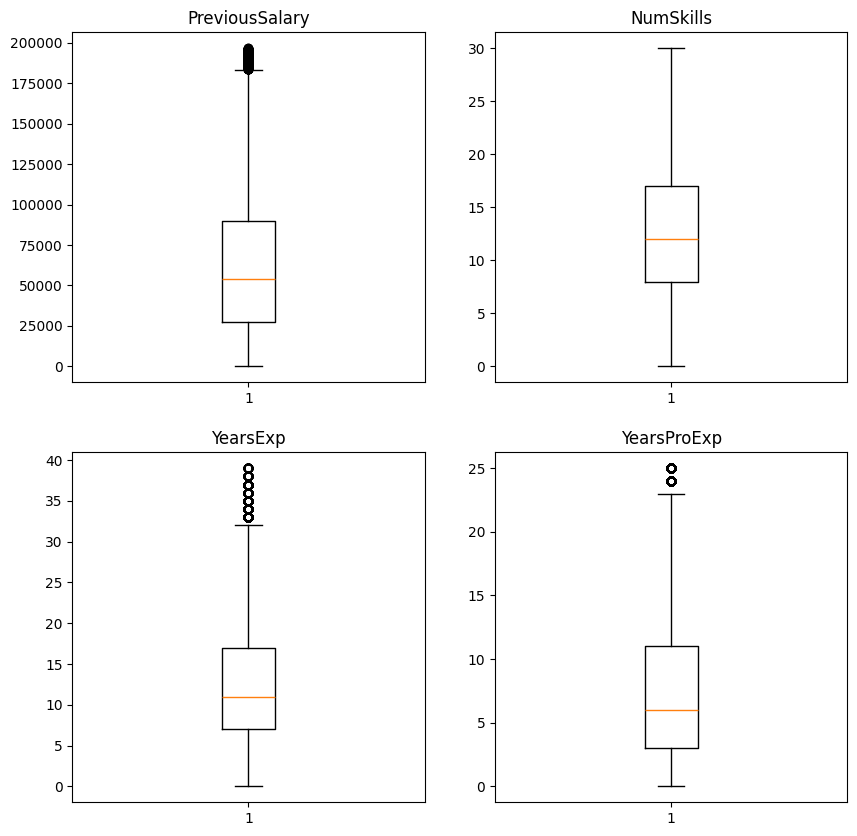

In [82]:
df_no=remove_outliers_iqr(col_box)
col_box=["PreviousSalary", "NumSkills", "YearsExp", "YearsProExp"]
plt.subplots(figsize=(10,10))
plt.delaxes()
i=1
for col in col_box:
    plt.subplot(2,2,i)
    plt.boxplot(df_no[col])
    plt.title(col)
    i+=1
plt.show()

In [83]:
df_no.to_csv("EDA.csv")

In [85]:
print(df_no)

       Age Accessibility        EdLevel  Employment MentalHealth MainBranch  \
0      <35            No         Master           1           No        Dev   
1      <35            No  Undergraduate           1           No        Dev   
2      <35            No         Master           1           No        Dev   
3      <35            No  Undergraduate           1           No        Dev   
5      <35            No         Master           1           No        Dev   
...    ...           ...            ...         ...          ...        ...   
73457  <35            No  Undergraduate           1           No        Dev   
73458  >35            No  Undergraduate           1           No        Dev   
73459  <35            No  Undergraduate           1           No        Dev   
73460  <35           Yes  Undergraduate           1          Yes        Dev   
73461  <35            No         Master           1           No        Dev   

       YearsExp  YearsProExp  PreviousSalary  NumSk

In [87]:
pd.to_csv(df_no,"eda.csv")

AttributeError: module 'pandas' has no attribute 'to_csv'